In [122]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')
#wav_fname = pjoin(data_dir, 'test-44100Hz-2ch-32bit-float-be.wav')
#wav_fname = 'data/scipy_io_tests_data_test-44100Hz-2ch-32bit-float-be.wav'
#wav_fname = 'data/file_example_WAV_1MG.wav'
wav_fname = 'data/file_example_WAV_1MG.wav'

In [124]:
samplerate, data = wavfile.read(wav_fname)
print(f"number of channels = {data.shape[1]}")

length = data.shape[0] / samplerate
print(f"length = {length}s")

IndexError: tuple index out of range

In [125]:
data

array([   0,  466,  933, ..., -933, -466,    0], dtype=int16)

In [87]:
sample_rate

268237

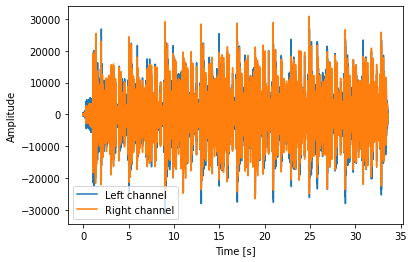

In [88]:
import matplotlib.pyplot as plt
import numpy as np

time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

### Right channel only

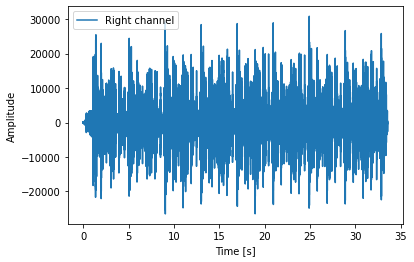

In [89]:
import matplotlib.pyplot as plt
import numpy as np

time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

### Small sample

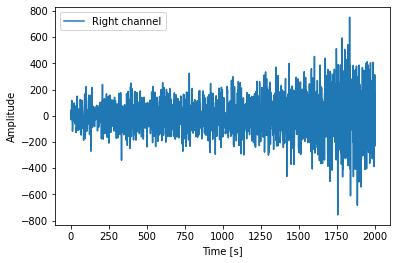

In [90]:
import matplotlib.pyplot as plt
import numpy as np

small_length = 2000
time = np.linspace(0., small_length, small_length)
plt.plot(time, data[:small_length, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

### Negate small length

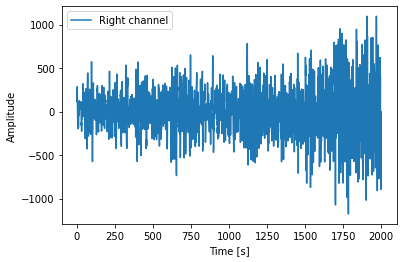

In [91]:
neg_small_length = [0.8 - x for x in data[:small_length, 0]]
time = np.linspace(0., small_length, small_length)
plt.plot(time, neg_small_length[:], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

### Sum small length

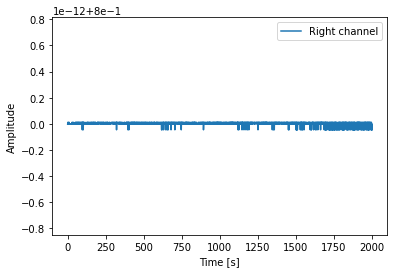

In [92]:
combined_small_length = np.add(data[:small_length, 0], neg_small_length)

time = np.linspace(0., small_length, small_length)
plt.plot(time, combined_small_length, label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [93]:
from scipy.io.wavfile import write
sample_rate = data.shape[0]
samples = data[:small_length, 0]

write('output/small_length_original.wav', sample_rate, data[:small_length, 0])
write('output/small_length_neg.wav', sample_rate, np.array(neg).astype(np.float32))
write('output/small_length_sum.wav', sample_rate, np.array(combined).astype(np.float32))

### Negating

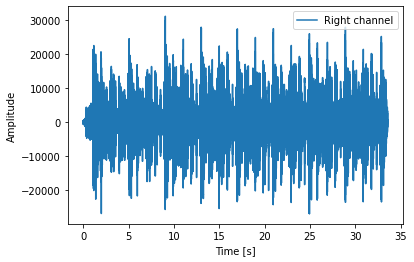

In [26]:
neg = [0.8 - x for x in data[:, 0]]
time = np.linspace(0., length, data.shape[0])
plt.plot(time, neg[:], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

### Summing

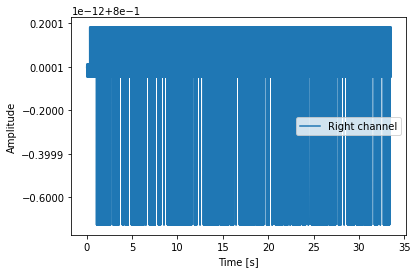

In [27]:
neg = [0.8 - x for x in data[:, 0]]
combined = np.add(data[:, 0], neg)

time = np.linspace(0., length, data.shape[0])
plt.plot(time, combined, label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [116]:
from scipy.io.wavfile import write
sample_rate = data.shape[0]
samples = data[:, 0]

#reconstructed_original = np.vstack((data[:, 0], data[:, 1])).T
#test = reconstructed_original == data
#print(test)

write('output/original.wav', sample_rate, data[:, 0])
write('output/neg.wav', sample_rate, np.array(neg).astype(np.int16))
write('output/sum.wav', sample_rate, np.array(combined).astype(np.int16))

[[ True  True]
 [ True  True]
 [ True  True]
 ...
 [ True  True]
 [ True  True]
 [ True  True]]


### Single channel only

In [152]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile

sample_rate = 44100; fs = 100
t = np.linspace(0., 1., sample_rate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("output/example.wav", sample_rate, data.astype(np.int16))

In [153]:
wav_fname = 'data/example.wav'
sample_rate, data = wavfile.read(wav_fname)
print(f"number of channels = 1")

length = data.shape[0] / samplerate
print(f"length = {length}s")

number of channels = 1
length = 1.0s


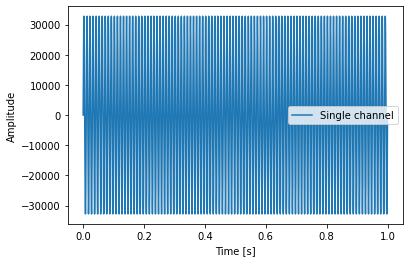

In [154]:
import matplotlib.pyplot as plt
import numpy as np

time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:], label="Single channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

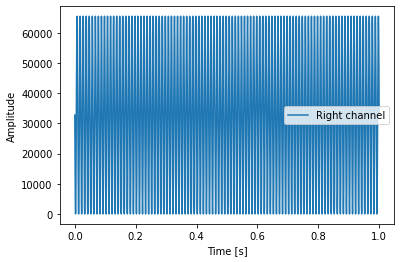

In [155]:
neg = [amplitude - x for x in data[:]]
time = np.linspace(0., length, data.size)
plt.plot(time, neg[:], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

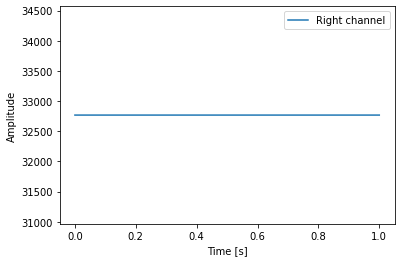

In [156]:
combined = np.add(data[:], neg)

plt.plot(time, combined, label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [157]:
sample_rate

44100

In [159]:
write('output/single-channel/original.wav', sample_rate, data[:])
write('output/single-channel/neg.wav', sample_rate, np.array(neg).astype(np.int16))
write('output/single-channel/sum.wav', sample_rate, np.array(combined).astype(np.int16))